# Reglas de predicción

Usualmente contamos con un conjunto de datos de entrenamiento

$$
d_{\text{train}}=\left\{ \,(y_i,\pmb{x}_i),\, 1\leq i \leq n \right\}
$$

donde $y_i$ es la variable de interés, llamada comunmente variable de **respuesta (response)**, cuya predicción se desea realizar basada en una correspondiente covariable $x_i$, llamada comunmente **características (features)**. Tales datos son llamados **supervisados** ya que la variable de respuesta puede ser considerada como una señal de supervisión etiquetada por humanos. 

Llamamos regla de predicción a cualquier función que regrese una variable de respuesta para covariables

$$
\hat{y} = r_{d_{\text{train}}}(x)
$$

La calidad de una predicción es evaluada mediante un función de pérdida $\ell\,:\, \mathbb{Y}^2 \to \mathbb{R}_+ $, con $\mathbb{Y}$ el espacio donde toman valores las respuestas $y_i$.

Dos elecciones usuales de funciones de pérdida son el error cuadrático

$$
\ell(y,\hat{y}) = (y-\hat{y})^2 
$$

y el error de clasificación, o perdida 0-1,

$$
\ell(y,\hat{y}) = \begin{cases}
1 & \text{si }y\neq \hat{y},
\\ 0 & \text{si } y = \hat{y}.
\end{cases}
$$

Nos interesa el caso en que los datos de entrenamiento están conformados por

$$
(y_i,x_i)\stackrel{\text{i.i.d.}}{\sim}F
$$

con $F$ una distribución en $\mathbb{R}^{p+1}$. Así tenemos que para una nueva observación $(y_{\text{new}},\pmb{x}_{\text{new}})\sim F$ independiente de $d_{\text{train}}$ se incurre en una pérdida

$$
\mathcal{l}(y_{\text{new}},\hat{y}_{\text{new}})
$$

con $\hat{y}_{\text{new}}=r_{d_{\text{train}}}(x_{\text{new}})$. Definimos la **tasa de error verdadera**

$$
\text{Err}_r = \mathbb{E}_{(y_{\text{new}},\pmb{x}_{\text{new}})\sim F}\left[\, \mathcal{l}(y_{\text{new}},r_{d_{\text{train}}}(x_{\text{new}}) \, |\, d_{\text{train}} \right].
$$

In [ ]:
using Distributions, Plots, LaTeXStrings, Random

In [ ]:
p₀ = 4
b = rand(Normal(),p₀)
y(x) = sum(b .* x.^(0:(p₀-1)))

Random.seed!(52)

n =  50
c = 5.0
x_train = (2 * c) .* rand(Beta(.2,.2),n) .- c
y_train = y.(x_train) + rand(Normal(0,3),length(x_train))
t_p = LinRange(-c,c,100);

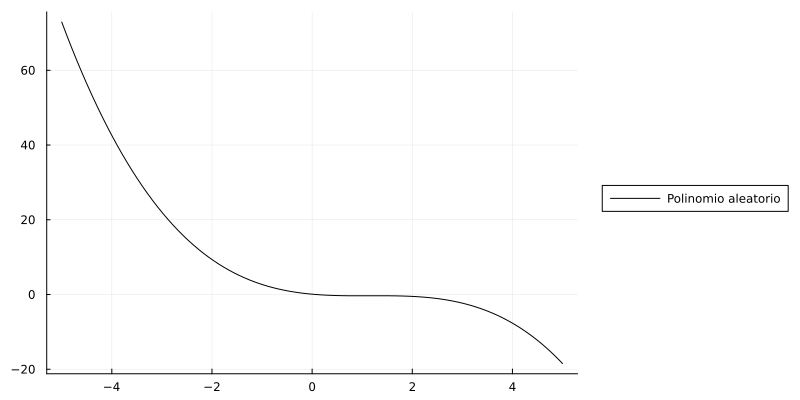

In [ ]:
plt = plot(t_p,y.(t_p),label="Polinomio aleatorio",c=:black,legend=:outerright,size=(800,400))

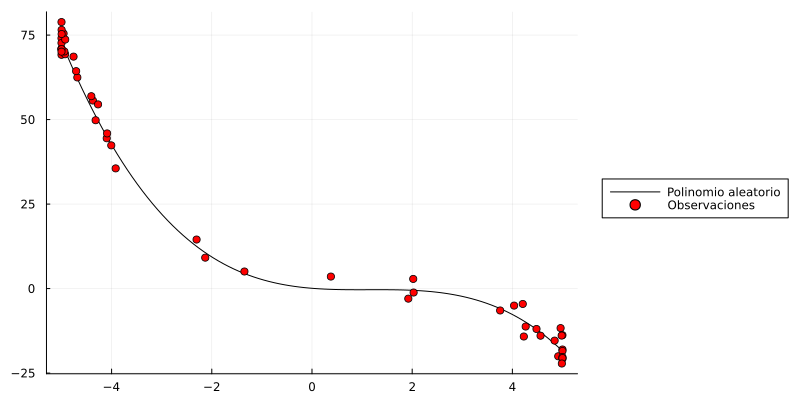

In [ ]:
scatter!(x_train,y_train,label="Observaciones",c=:red)

In [ ]:
function pol_regre(p::Int64,x::Array{Float64,1},y::Array{Float64,1})
    n = length(x)
    Φ = zeros(n,p+1)
    for i in 1:n
        for j in 1:(p+1)
            Φ[i,j] = x[i]^(j-1)
        end
    end
    w = inv( Φ'* Φ ) *  Φ' * y
    return pol(x) = sum(w .* x.^(0:1:p) )
end

pol_regre (generic function with 1 method)

In [ ]:
pol0 = pol_regre(0,x_train,y_train)
pol1 = pol_regre(1,x_train,y_train)
pol2 = pol_regre(2,x_train,y_train)
pol3 = pol_regre(3,x_train,y_train)
pol4 = pol_regre(4,x_train,y_train)
pol5 = pol_regre(5,x_train,y_train)
pol6 = pol_regre(6,x_train,y_train)
pol30 = pol_regre(30,x_train,y_train)

(::var"#pol#1"{Int64, Vector{Float64}}) (generic function with 1 method)

In [ ]:
pol_v = [pol0,pol1,pol2,pol3,pol4,pol5,pol6,pol30];

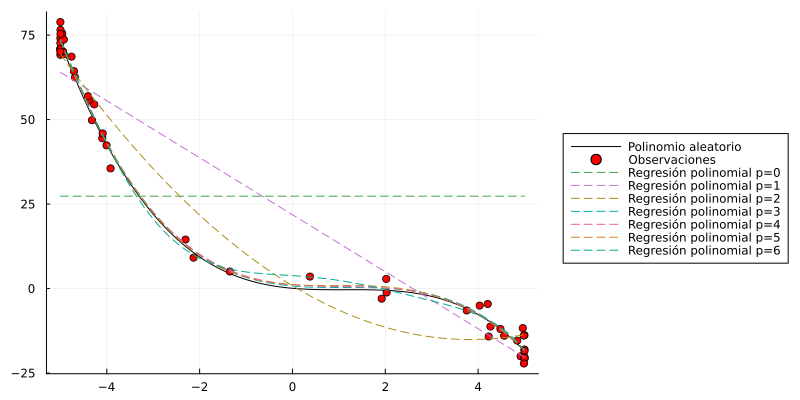

In [ ]:
plot!(t_p,pol0.(t_p),linestyle=:dash,label="Regresión polinomial p=0")
plot!(t_p,pol1.(t_p),linestyle=:dash,label="Regresión polinomial p=1")
plot!(t_p,pol2.(t_p),linestyle=:dash,label="Regresión polinomial p=2")
plot!(t_p,pol3.(t_p),linestyle=:dash,label="Regresión polinomial p=3")
plot!(t_p,pol4.(t_p),linestyle=:dash,label="Regresión polinomial p=4")
plot!(t_p,pol5.(t_p),linestyle=:dash,label="Regresión polinomial p=5")
plot!(t_p,pol6.(t_p),linestyle=:dash,label="Regresión polinomial p=6")

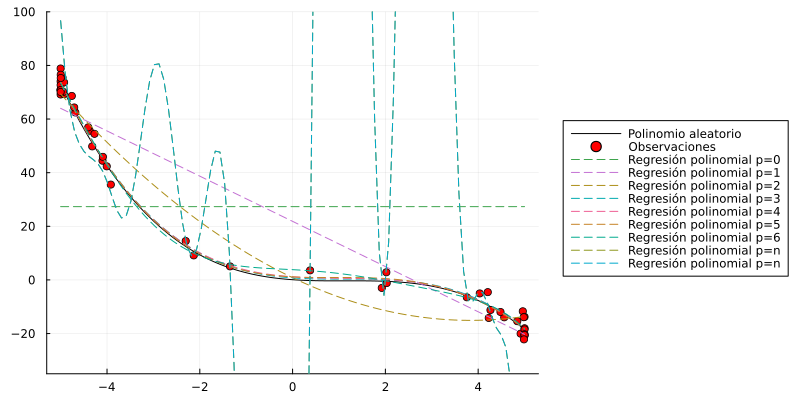

In [ ]:
plot!(t_p,pol30.(t_p),linestyle=:dash, label="Regresión polinomial p=n", ylim=(-35,100))

Un primer estimador para la tasa de error verdadera es el error aparente

$$
\text{err} = \frac{1}{n}\sum_{(y,\pmb{x})\in d_{\text{train}}} \ell(y,\hat{y})
$$

In [ ]:
err_v = zeros(7)
for i in 1:7
    err_v[i] = mean( [ (y_train[j]-pol_v[i](x_train[j]))^2.0  for j in 1:length(y_train)] )
end

In [ ]:
using DataFrames

err_df = DataFrame(
    err = err_v,
)

7×1 DataFrame
 Row │ err        
     │ Float64    
─────┼────────────
   1 │ 1462.36
   2 │  106.133
   3 │   44.3539
   4 │    8.09798
   5 │    8.07532
   6 │    8.04454
   7 │    7.72001

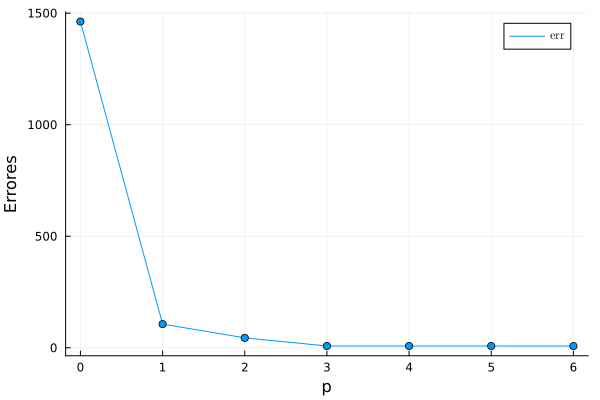

In [ ]:
plt_Err = plot(collect(0:1:6),err_v,xlabel="p",ylabel="err",label=L"\textrm{err}")
scatter!(collect(0:1:6),err_v,xlabel="p",ylabel="Errores",label="",c=1)

In [ ]:
err_v'

1×7 adjoint(::Vector{Float64}) with eltype Float64:
 1462.36  106.133  44.3539  8.09798  8.07532  8.04454  7.72001

Ya que la regla de predicción $r$ se ajusta con base en los datos de entrenamiento es usual que subestimemos la tasa de error verdadera $\text{Err}_r $ al estimarla con el error aparente $\text{err}$. Lo "ideal" sería contar con una gran cantidad de datos de validación, indepednientes de $d_{\text{train}}$,

$$
d_{\text{val}}=\left\{ \,(\tilde{y}_i,\tilde{\pmb{x}}_i),\, 1\leq i \leq n_{\text{val}} \right\} \stackrel{\text{i.i.d.}}{\sim}F
$$
y estimar insesgadamente con
$$
\widehat{\text{Err}}_{\text{val}} = \frac{1}{n_{\text{val}}}\sum_{(\tilde{y},\tilde{\pmb{x}})\in d_{\text{val}}} \mathcal{l}(\tilde{y},\hat{\tilde{y}}).
$$

In [ ]:
x_val_10 = rand(Uniform(-1.0,1.0),10)
y_val_10 = y.(x_val_10) + rand(Normal(0,0.25),length(x_val_10))
x_val_100 = rand(Uniform(-1.0,1.0),100)
y_val_100 = y.(x_val_100) + rand(Normal(0,0.25),length(x_val_100))
x_val_1000 = rand(Uniform(-1.0,1.0),1000)
y_val_1000 = y.(x_val_1000) + rand(Normal(0,0.25),length(x_val_1000));

In [ ]:
err_val_10 = [ mean( [ (y_val_10[j]-pol_v[i](x_val_10[j]))^2.0  for j in 1:10] ) for i in 1:7]
err_val_100 = [ mean( [ (y_val_100[j]-pol_v[i](x_val_100[j]))^2.0  for j in 1:100] ) for i in 1:7]
err_val_1000 = [ mean( [ (y_val_1000[j]-pol_v[i](x_val_1000[j]))^2.0  for j in 1:1000] ) for i in 1:7];

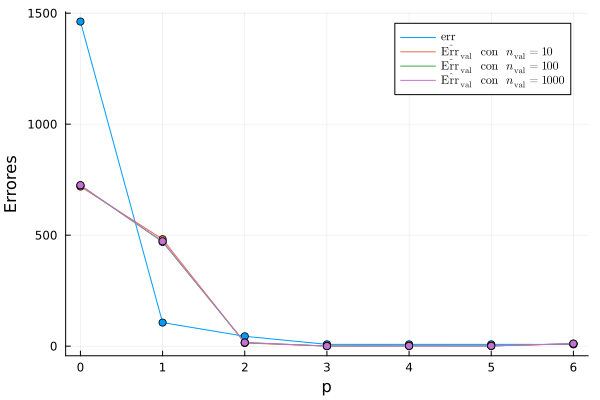

In [ ]:
plot!(collect(0:1:6),err_val_10,xlabel="p",c=2,label=L"\widehat{\textrm{Err}}_{\textrm{val}}\;\;\; \textrm{ con }\;\;\; n_\textrm{val}=10")
scatter!(collect(0:1:6),err_val_10,xlabel="p",label="",c=2)
plot!(collect(0:1:6),err_val_100,xlabel="p",c=3,label=L"\widehat{\textrm{Err}}_{\textrm{val}}\;\;\; \textrm{ con }\;\;\; n_\textrm{val}=100")
scatter!(collect(0:1:6),err_val_100,xlabel="p",label="",c=3)
plot!(collect(0:1:6),err_val_1000,xlabel="p",c=4,label=L"\widehat{\textrm{Err}}_{\textrm{val}}\;\;\; \textrm{ con }\;\;\; n_\textrm{val}=1000")
scatter!(collect(0:1:6),err_val_1000,xlabel="p",label="",c=4)

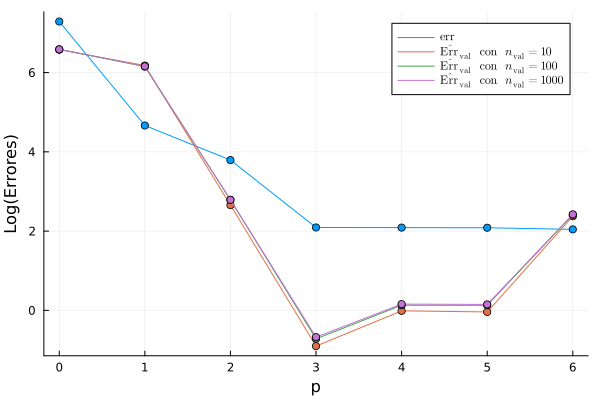

In [ ]:
plt_Err_log = plot(collect(0:1:6),log.(err_v),xlabel="p",ylabel="err",label=L"\textrm{err}")
scatter!(collect(0:1:6),log.(err_v),xlabel="p",ylabel="Log(Errores)",label="",c=1)
plot!(collect(0:1:6),log.(err_val_10),xlabel="p",c=2,label=L"\widehat{\textrm{Err}}_{\textrm{val}}\;\;\; \textrm{ con }\;\;\; n_\textrm{val}=10")
scatter!(collect(0:1:6),log.(err_val_10),xlabel="p",label="",c=2)
plot!(collect(0:1:6),log.(err_val_100),xlabel="p",c=3,label=L"\widehat{\textrm{Err}}_{\textrm{val}}\;\;\; \textrm{ con }\;\;\; n_\textrm{val}=100")
scatter!(collect(0:1:6),log.(err_val_100),xlabel="p",label="",c=3)
plot!(collect(0:1:6),log.(err_val_1000),xlabel="p",c=4,label=L"\widehat{\textrm{Err}}_{\textrm{val}}\;\;\; \textrm{ con }\;\;\; n_\textrm{val}=1000")
scatter!(collect(0:1:6),log.(err_val_1000),xlabel="p",label="",c=4)

In [ ]:
findmin(err_val_1000)

(0.509845797833136, 4)

La validación-cruzada es una alternativa al uso de datos de validación donde serparamos los datos de entrenamiento de tal forma que una parte nos sirva como datos de validación. Un caso usual es la validación-cruzada que deja una observación fuera, llamada *loo* por las siglas en inglés de "leave one out". Denotamos para $1\leq i \leq n$
$$
d_{\text{train}-i} = \left\{ \,(y_j,\pmb{x}_j) \,:\, 1\leq j \leq n,\, j\neq i \right\}
$$
y a la regla de predicción con tales datos de entrenamiento es denotada $r_{d_{\text{train}-i}}(x)$ y la predicción del dato dejado fuera del entrenamiento $\hat{y}_{(i)} = r_{d_{\text{train}-i}}(x_i)$.

El estimador de validación-cuzada para del error de predicción está dado por
$$
\widehat{\text{Err}}_{\text{CV}} = \frac{1}{n}\sum_{i=1}^n \mathcal{l}(y_i,\hat{y}_{(i)})
$$

In [ ]:
n = length(y_train)

50

In [ ]:
cv_xtrain_v = [ x_train[1:n .!=i] for i in 1:n ]
cv_ytrain_v = [ y_train[1:n .!=i] for i in 1:n ];

In [ ]:
cvloo_v = zeros(7)
for k in 1:7
    cvloo_v[k] = mean( [ (pol_regre(k-1,cv_xtrain_v[i],cv_ytrain_v[i])(x_train[i]) - y_train[i])^2 for i in 1:n ] )
end

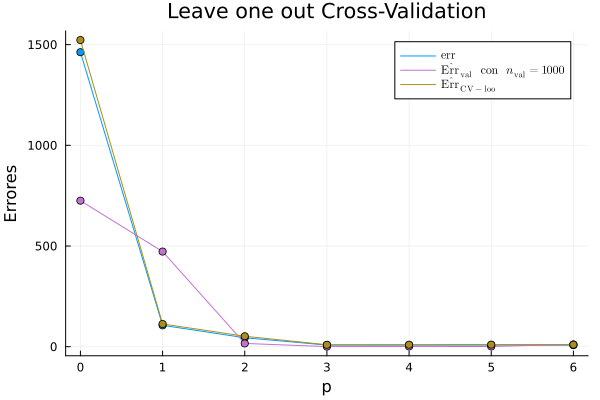

In [ ]:
plt_loo = plot(collect(0:1:6),err_v,xlabel="p",ylabel="err",label=L"\textrm{err}")
scatter!(collect(0:1:6),err_v,xlabel="p",ylabel="Errores",label="",c=1)
plot!(collect(0:1:6),err_val_1000,xlabel="p",c=4,label=L"\widehat{\textrm{Err}}_{\textrm{val}}\;\;\; \textrm{ con }\;\;\; n_\textrm{val}=1000")
scatter!(collect(0:1:6),err_val_1000,xlabel="p",label="",c=4)
plot!(collect(0:1:6),cvloo_v,xlabel="p",ylabel="err",label=L"\widehat{\textrm{Err}}_{\textrm{CV-loo}}",c=5)
scatter!(collect(0:1:6),cvloo_v,xlabel="p",ylabel="Errores",label="",c=5)
title!("Leave one out Cross-Validation")

In [ ]:
# Modelo elegido por error de validación
findmin(err_val_1000)

(0.509845797833136, 4)

In [ ]:
# Modelo elegido por CV-loo
findmin(cvloo_v)

(9.527213532032864, 4)

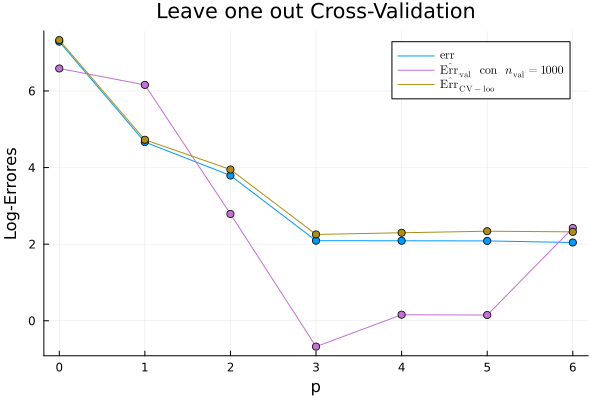

In [ ]:
plt_loo_log = plot(collect(0:1:6),log.(err_v),xlabel="p",ylabel="err",label=L"\textrm{err}")
scatter!(collect(0:1:6),log.(err_v),xlabel="p",ylabel="Log-errores",label="",c=1)
plot!(collect(0:1:6),log.(err_val_1000),xlabel="p",c=4,label=L"\widehat{\textrm{Err}}_{\textrm{val}}\;\;\; \textrm{ con }\;\;\; n_\textrm{val}=1000")
scatter!(collect(0:1:6),log.(err_val_1000),xlabel="p",label="",c=4)
plot!(collect(0:1:6),log.(cvloo_v),xlabel="p",ylabel="err",label=L"\widehat{\textrm{Err}}_{\textrm{CV-loo}}",c=5)
scatter!(collect(0:1:6),log.(cvloo_v),xlabel="p",ylabel="Log-Errores",label="",c=5)
title!("Leave one out Cross-Validation")

Más precisamente, $\widehat{\text{Err}}_{\text{CV}}$ es el estimador de validación-cuzada que "deja una observación fuera" llamado **loo** por las siglas en inglés de "leave one out". También es popular el uso de validación-cruzada co $k$ pliegues, llamado en inglés "$k$-fold cross-validation" donde se elige una partición de los datos de entrenamiento en $k$ subconjuntos denotados $d(k)$ y tales que $\#(d(k))\approx n/k$. Denotamos ahora el conjunto de datos

$$
d_{\text{train}-k} = d_{\text{train}}\setminus d(k)
$$

que es utilizado para entrenar un modelo que realice predicción en el $k$-ésimo subconjunto de datos.

In [ ]:
K = 5
ρ = ceil(Int,n/5)
cv_xtrain_v = [ x_train[ .!(1+(i-1)*ρ .<= collect(1:n) .<= ρ*i) ] for i in 1:K ]
cv_ytrain_v = [ y_train[ .!(1+(i-1)*ρ .<= collect(1:n) .<= ρ*i) ] for i in 1:K ];

In [ ]:
cvkfold_v = zeros(7)
for d in 1:7
    cvkfold_v[d] = mean( [ mean( [ ( pol_regre(d-1,cv_xtrain_v[k],cv_ytrain_v[k])(x_train[i]) - y_train[i])^2 for i in collect(1:n)[(1+(k-1)*ρ):(ρ*k)] ] )  for k in 1:K ] )
end

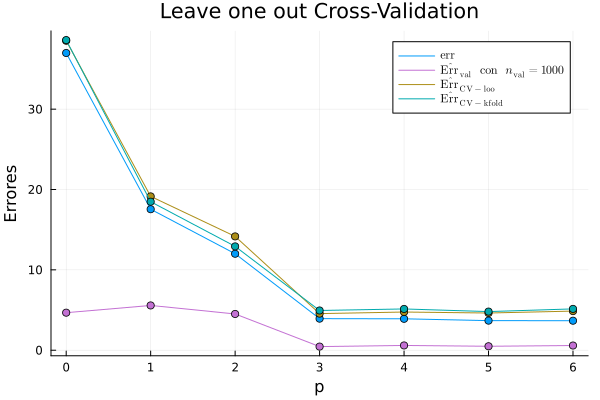

In [ ]:
plt_cvkfol = plot(collect(0:1:6),err_v,xlabel="p",ylabel="err",label=L"\textrm{err}")
scatter!(collect(0:1:6),err_v,xlabel="p",ylabel="Errores",label="",c=1)
plot!(collect(0:1:6),err_val_1000,xlabel="p",c=4,label=L"\widehat{\textrm{Err}}_{\textrm{val}}\;\;\; \textrm{ con }\;\;\; n_\textrm{val}=1000")
scatter!(collect(0:1:6),err_val_1000,xlabel="p",label="",c=4)
plot!(collect(0:1:6),cvloo_v,xlabel="p",ylabel="err",label=L"\widehat{\textrm{Err}}_{\textrm{CV-loo}}",c=5)
scatter!(collect(0:1:6),cvloo_v,xlabel="p",ylabel="Errores",label="",c=5)
plot!(collect(0:1:6),cvkfold_v,xlabel="p",ylabel="err",label=L"\widehat{\textrm{Err}}_{\textrm{CV-kfold}}",c=6)
scatter!(collect(0:1:6),cvkfold_v,xlabel="p",ylabel="Errores",label="",c=6)
title!("Leave one out Cross-Validation")

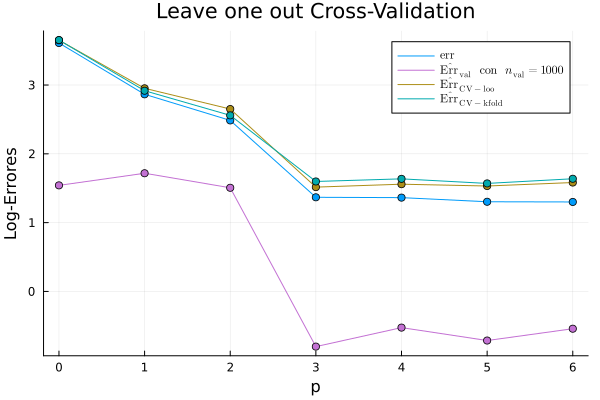

In [ ]:
plt_cvkfol_log = plot(collect(0:1:6),log.(err_v),xlabel="p",ylabel="err",label=L"\textrm{err}")
scatter!(collect(0:1:6),log.(err_v),xlabel="p",ylabel="Log-Errores",label="",c=1)
plot!(collect(0:1:6),log.(err_val_1000),xlabel="p",c=4,label=L"\widehat{\textrm{Err}}_{\textrm{val}}\;\;\; \textrm{ con }\;\;\; n_\textrm{val}=1000")
scatter!(collect(0:1:6),log.(err_val_1000),xlabel="p",label="",c=4)
plot!(collect(0:1:6),log.(cvloo_v),xlabel="p",ylabel="err",label=L"\widehat{\textrm{Err}}_{\textrm{CV-loo}}",c=5)
scatter!(collect(0:1:6),log.(cvloo_v),xlabel="p",ylabel="Log-Errores",label="",c=5)
plot!(collect(0:1:6),log.(cvkfold_v),xlabel="p",ylabel="err",label=L"\widehat{\textrm{Err}}_{\textrm{CV-kfold}}",c=6)
scatter!(collect(0:1:6),log.(cvkfold_v),xlabel="p",ylabel="Log-Errores",label="",c=6)
title!("Leave one out Cross-Validation")

In [ ]:
p₀ = 4
n =  150
c = 100.0
σ₀ = 1.25
b = rand(Normal(),p₀)
y(x) = sum(b .* x.^(0:(p₀-1)))
x_train = rand(Uniform(-c,c),n)
y_train = y.(x_train) + rand(Normal(0,σ₀),length(x_train))
n_val = 10000
x_val = rand(Uniform(-c,c),n_val)
y_val = y.(x_val) .+ rand(Normal(0,σ₀),n_val);

In [ ]:
K = 5
ρ = ceil(Int,n/K)
cv_xtrain_v = [ x_train[ .!(1+(i-1)*ρ .<= collect(1:n) .<= ρ*i) ] for i in 1:K ]
cv_ytrain_v = [ y_train[ .!(1+(i-1)*ρ .<= collect(1:n) .<= ρ*i) ] for i in 1:K ]
cvkfold_v = zeros(7)
for d in 1:7
    cvkfold_v[d] = mean( [ mean( [ ( pol_regre(d-1,cv_xtrain_v[k],cv_ytrain_v[k])(x_train[i]) - y_train[i])^2 for i in collect(1:n)[(1+(k-1)*ρ):(ρ*k)] ] )  for k in 1:K ] )
end

In [ ]:
cv_xtrain_v = [ x_train[1:n .!=i] for i in 1:n ]
cv_ytrain_v = [ y_train[1:n .!=i] for i in 1:n ];
cvloo_v = zeros(7)
for k in 1:7
    cvloo_v[k] = mean( [ (pol_regre(k-1,cv_xtrain_v[i],cv_ytrain_v[i])(x_train[i]) - y_train[i])^2 for i in 1:n ] )
end

In [ ]:
pol0 = pol_regre(0,x_train,y_train)
pol1 = pol_regre(1,x_train,y_train)
pol2 = pol_regre(2,x_train,y_train)
pol3 = pol_regre(3,x_train,y_train)
pol4 = pol_regre(4,x_train,y_train)
pol5 = pol_regre(5,x_train,y_train)
pol6 = pol_regre(6,x_train,y_train)
pol_v = [pol0,pol1,pol2,pol3,pol4,pol5,pol6];

In [ ]:
err_v = zeros(7)
for i in 1:7
    err_v[i] = mean( [ (y_train[j]-pol_v[i](x_train[j]))^2.0  for j in 1:length(y_train)] )
end

In [ ]:
err_val = [ mean( [ (y_val[j]-pol_v[i](x_val[j]))^2.0  for j in 1:1000] ) for i in 1:7];

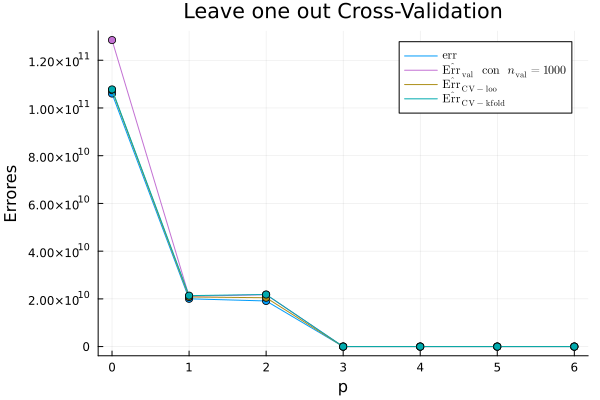

In [ ]:
plt = plot(collect(0:1:6),err_v,xlabel="p",ylabel="err",label=L"\textrm{err}")
scatter!(collect(0:1:6),err_v,xlabel="p",ylabel="Errores",label="",c=1)
plot!(collect(0:1:6),err_val,xlabel="p",c=4,label=L"\widehat{\textrm{Err}}_{\textrm{val}}\;\;\; \textrm{ con }\;\;\; n_\textrm{val}=1000")
scatter!(collect(0:1:6),err_val,xlabel="p",label="",c=4)
plot!(collect(0:1:6),cvloo_v,xlabel="p",ylabel="err",label=L"\widehat{\textrm{Err}}_{\textrm{CV-loo}}",c=5)
scatter!(collect(0:1:6),cvloo_v,xlabel="p",ylabel="Errores",label="",c=5)
plot!(collect(0:1:6),cvkfold_v,xlabel="p",ylabel="err",label=L"\widehat{\textrm{Err}}_{\textrm{CV-kfold}}",c=6)
scatter!(collect(0:1:6),cvkfold_v,xlabel="p",ylabel="Errores",label="",c=6)
title!("Leave one out Cross-Validation")

Con 150 datos.

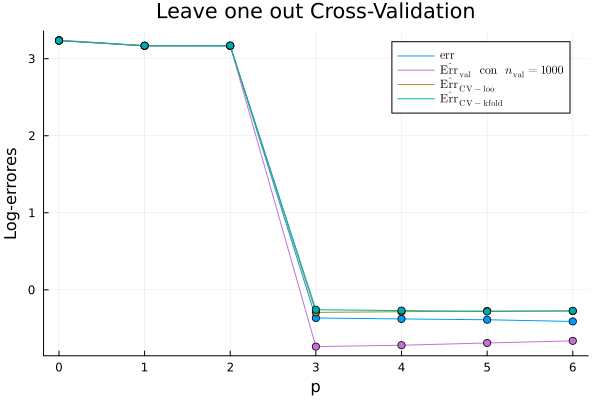

In [ ]:
plt = plot(collect(0:1:6),log.(log.(err_v)),xlabel="p",ylabel="err",label=L"\textrm{err}")
scatter!(collect(0:1:6),log.(log.(err_v)),xlabel="p",ylabel="Log-errores",label="",c=1)
plot!(collect(0:1:6),log.(log.(err_val)),xlabel="p",c=4,label=L"\widehat{\textrm{Err}}_{\textrm{val}}\;\;\; \textrm{ con }\;\;\; n_\textrm{val}=1000")
scatter!(collect(0:1:6),log.(log.(err_val)),xlabel="p",label="",c=4)
plot!(collect(0:1:6),log.(log.(cvloo_v)),xlabel="p",label=L"\widehat{\textrm{Err}}_{\textrm{CV-loo}}",c=5)
scatter!(collect(0:1:6),log.(log.(cvloo_v)),xlabel="p",label="",c=5)
plot!(collect(0:1:6),log.(log.(cvkfold_v)),xlabel="p",label=L"\widehat{\textrm{Err}}_{\textrm{CV-kfold}}",c=6)
scatter!(collect(0:1:6),log.(log.(cvkfold_v)),xlabel="p",label="",c=6)
title!("Leave one out Cross-Validation")

In [ ]:
# Modelo elegido con CV-loo
findmin(cvloo_v)

(2.1084816187441295, 4)

In [ ]:
# Modelo elegido con CV-K-fold
findmin(cvkfold_v)

(2.1278379674352585, 6)

In [ ]:
function cv_loo_func(d::Int64,y_train::Array{Float64,1},x_train::Array{Float64,1},pred_func::Function)
    cv_xtrain_v = [ x_train[1:n .!=i] for i in 1:n ]
    cv_ytrain_v = [ y_train[1:n .!=i] for i in 1:n ]
    mean( [ (pred_func(d,cv_xtrain_v[i],cv_ytrain_v[i])(x_train[i]) - y_train[i])^2 for i in 1:n ] )
end

cv_loo_func (generic function with 1 method)

In [ ]:
function cv_kfold_func(d::Int64,K::Int64,y_train::Array{Float64,1},x_train::Array{Float64,1},pred_func::Function)
    ρ = ceil(Int,n/K)
    cv_xtrain_v = [ x_train[ .!(1+(i-1)*ρ .<= collect(1:n) .<= ρ*i) ] for i in 1:K ]
    cv_ytrain_v = [ y_train[ .!(1+(i-1)*ρ .<= collect(1:n) .<= ρ*i) ] for i in 1:K ]
    mean( [ mean( [ ( pred_func(d,cv_xtrain_v[k],cv_ytrain_v[k])(x_train[i]) - y_train[i])^2 for i in collect(1:n)[(1+(k-1)*ρ):(ρ*k)] ] )  for k in 1:K ] )
end

cv_kfold_func (generic function with 1 method)

In [ ]:
function val_func(d::Int64,n_val::Int64,c::Float64,y_train::Array{Float64,1},x_train::Array{Float64,1},pred_func::Function)
    x_val = rand(Uniform(-c,c),n_val)
    y_val = y.(x_val) + rand(Normal(0,0.25),n_val)
    return  mean( [ (y_val[j]-pred_func(x_val[j]))^2.0  for j in 1:n_val] )
end


val_func (generic function with 1 method)

In [ ]:
M = 500
n = 150
c = 1.0
K = 5
n_val = 3000
p₀ = 4
cv_kfold_pol3 = zeros(M)
cv_kfold_pol5 = zeros(M)
cv_loo_pol3 = zeros(M)
cv_loo_pol5 = zeros(M)
ev_pol3 = zeros(M)
ev_pol5 = zeros(M)
for i in 1:M
    b = rand(Normal(),p₀)
    y(x) = sum(b .* x.^(0:(p₀-1)))
    x_train = rand(Uniform(-c,c),n)
    y_train = y.(x_train) + rand(Normal(0,0.25),length(x_train))
    ev_pol3[i] = val_func(3,n_val,c,y_train,x_train,pol_regre(3,x_train,y_train))
    ev_pol5[i] = val_func(3,n_val,c,y_train,x_train,pol_regre(5,x_train,y_train))
    cv_kfold_pol3[i] = cv_kfold_func(3,K,y_train,x_train,pol_regre)
    cv_kfold_pol5[i] = cv_kfold_func(5,K,y_train,x_train,pol_regre)
    cv_loo_pol3[i] = cv_loo_func(3,y_train,x_train,pol_regre)
    cv_loo_pol5[i] = cv_loo_func(5,y_train,x_train,pol_regre)
end

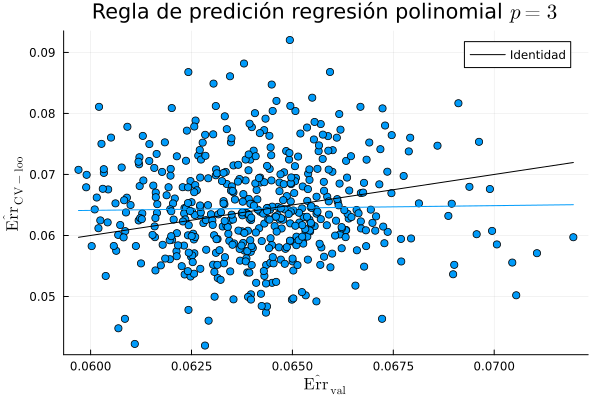

In [ ]:
plt = scatter(ev_pol3,cv_loo_pol3,label="",smooth=true,title="Regla de predición regresión polinomial \$p=3\$")
plot!(sort(ev_pol3),sort(ev_pol3),c=:black,label="Identidad")
xlabel!(L"\widehat{\textrm{Err}}_{\textrm{val}}")
ylabel!(L"\widehat{\textrm{Err}}_{\textrm{CV-loo}}")

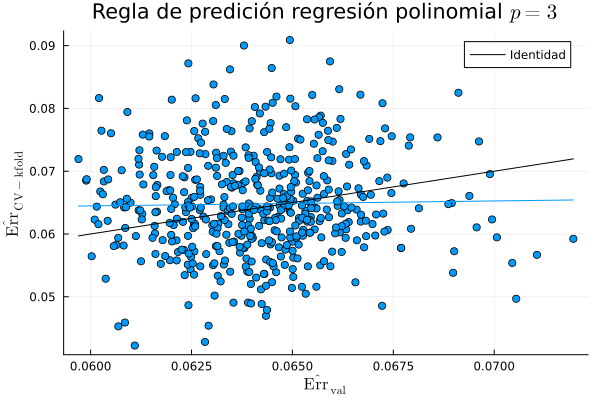

In [ ]:
plt = scatter(ev_pol3,cv_kfold_pol3,label="",smooth=true,title="Regla de predición regresión polinomial \$p=3\$")
plot!(sort(ev_pol3),sort(ev_pol3),c=:black,label="Identidad")
xlabel!(L"\widehat{\textrm{Err}}_{\textrm{val}}")
ylabel!(L"\widehat{\textrm{Err}}_{\textrm{CV-kfold}}")

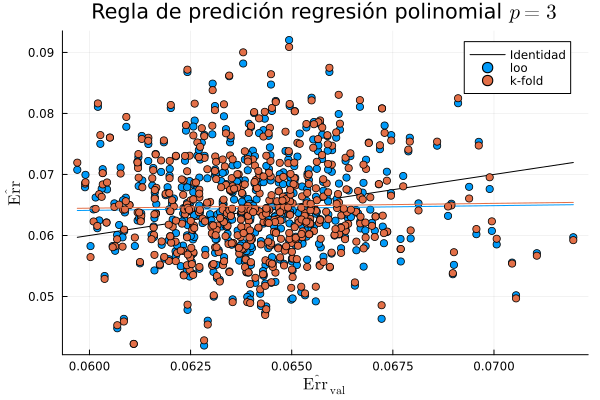

In [ ]:
plt = plot(sort(ev_pol3),sort(ev_pol3),c=:black,label="Identidad")
scatter!(ev_pol3,cv_loo_pol3,label="loo",c=1,smooth=true,title="Regla de predición regresión polinomial \$p=3\$")
scatter!(ev_pol3,cv_kfold_pol3,label="k-fold",c=2,smooth=true)
xlabel!(L"\widehat{\textrm{Err}}_{\textrm{val}}")
ylabel!(L"\widehat{\textrm{Err}}")

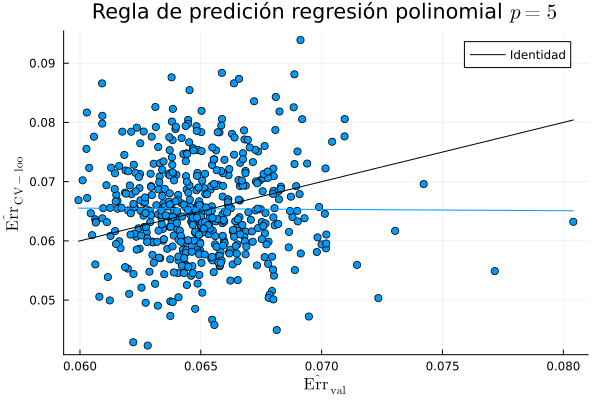

In [ ]:
plt = scatter(ev_pol5,cv_loo_pol5,label="",smooth=:true,title="Regla de predición regresión polinomial \$p=5\$")
plot!(sort(ev_pol5),sort(ev_pol5),c=:black,label="Identidad")
xlabel!(L"\widehat{\textrm{Err}}_{\textrm{val}}")
ylabel!(L"\widehat{\textrm{Err}}_{\textrm{CV-loo}}")

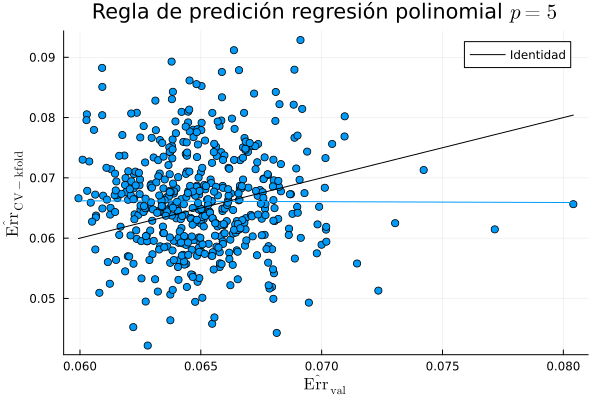

In [ ]:
plt = scatter(ev_pol5,cv_kfold_pol5,label="",smooth=true,title="Regla de predición regresión polinomial \$p=5\$")
plot!(sort(ev_pol5),sort(ev_pol5),c=:black,label="Identidad")
xlabel!(L"\widehat{\textrm{Err}}_{\textrm{val}}")
ylabel!(L"\widehat{\textrm{Err}}_{\textrm{CV-kfold}}")

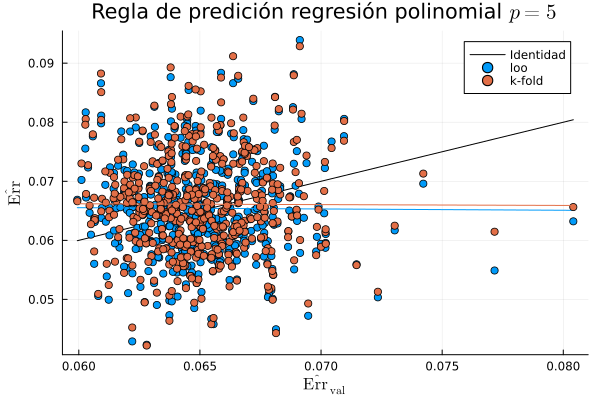

In [ ]:
plt = plot(sort(ev_pol5),sort(ev_pol5),c=:black,label="Identidad")
scatter!(ev_pol5,cv_loo_pol5,label="loo",c=1,smooth=true,title="Regla de predición regresión polinomial \$p=5\$")
scatter!(ev_pol5,cv_kfold_pol5,label="k-fold",c=2,smooth=true)
xlabel!(L"\widehat{\textrm{Err}}_{\textrm{val}}")
ylabel!(L"\widehat{\textrm{Err}}")

In [ ]:
using MLBase

# functions

function compute_center(X::Matrix{Float64})
	c = vec(mean(X, 2))
	print("training on %d samples => (%.4f, %.4f)\n", 
		size(X,2), c[1], c[2])
	return c
end

function compute_rmse(c::Vector{Float64}, X::Matrix{Float64}) 
	v = sqrt(mean(sum(abs2(X .- c),1)))
	print("RMSE on test set: %.6f\n\n", v)
	return v
end

# data

const m = 200
const data = [2., 3.] .+ randn(2, m)

# cross validation

(c, v, inds) = cross_validate(
	inds -> compute_center(data[:, inds]),     		# training function
	(c, inds) -> compute_rmse(c, data[:, inds]),    # evaluation function
	m,    			# total number of samples
	Kfold(m, 5), 	# cross validation plan: 5-fold 
	Reverse)		# smaller score indicates better model

# display results

print("best model = (%.4f, %.4f), score = %.6f\n", c[1], c[2], v)

LoadError: MethodError: no method matching cross_validate(::var"#72#74", ::var"#73#75", ::Int64, ::Kfold, ::Base.Order.ReverseOrdering{Base.Order.ForwardOrdering})
The function `cross_validate` exists, but no method is defined for this combination of argument types.

[0mClosest candidates are:
[0m  cross_validate(::Function, ::Function, ::Int64, ::Any)
[0m[90m   @[39m [32mMLBase[39m [90mC:\Users\Admin\.julia\packages\MLBase\9EP41\src\[39m[90m[4mcrossval.jl:184[24m[39m
[0m  cross_validate(::Function, ::Function, ::Integer, ::Any)
[0m[90m   @[39m [32mMLBase[39m [90mC:\Users\Admin\.julia\packages\MLBase\9EP41\src\[39m[90m[4mcrossval.jl:200[24m[39m


* Bibliografía

- "Computer age statistical learning" de Efron y Hastie